# Task: Which populations have contracted COVID-19 and require ventilators?

This notebook seeks to find the areas of highest risk in the US which require, or soon will have a dire need, of ventilators. Furthermore, the goal of this notebook is to establish an evaluation method for determining need universally.

There is certainly room for improvement in this notebook and I am open to and will appreciate any critical and constructive feedback. Feel free to fork this notebook if you wish to explore any ideas further, I just ask that you credit me if you publish an expanded version. Because of the datasets I chose to use, the recommendations are for the United States and its territories. This notebook attempts to find opportunities for improvement, I am not modeling future activity as I'm hoping for positive disruptive action to render many of the current predictive models overly pessimistic.

Special thanks to:
* Kaggle and its community for hosting the datasets, challenges, and useful material that make notebooks like these possible
* The Roche Data Science Coalition (RDSC) for the task (and for recognizing this notebook as the accepted submission in the first evaluation round)

Version 3 update 4/12/20, add county level data and findings

Version 4 update 4/25/20, started to add cancer dataset and merged with county level data, update submission format.

version 5 update 5/2/20, updated findings with more current data. Adjusting measurement of morbidity rate to account for delay between confirmed and survival confirmed.

version 6 update 5/10/20, tweaks and updates, more notes on changes over time, added abstract.

version 7 update 6/2/20, Update to include new data, adjust some wording

# Abstract

1. **Scientific rigor:**
<br />The solutions in this notebook are primarily based on ratios, correlations, and trends over time. The data sources are all trustworthy and have citations. For ventilator need I am assuming that areas of high morbidity are going to have the greatest need, and that likewise, if there are common features in these high risk areas we can find new areas of higher potential risk.

2. **Scientific model/strategy:**
<br />Ratios, correlations, and trends over time.

3. **Unique and novel insight:**
<br />There are some interesting correlations noted in the county level data section which may not be previously discovered. There is an interesting find in the subsection on cancer which I will need to do further research on before I could speak on its potential impact.

4. **Market Translation and Applicability:**
<br />There are some insights based on current ventilator needs of certain regions. The method for determining such methods should be easily applicable to other locations. Some of the discovered correlations might also be useful for determining public policy.

5. **Speed to market:**
<br />The approach of this notebook should be easy to compare to current methods for ventilator allocation. This being a supply chain issue you can compare this method to current methods and evaluate which has the greatest idle inventory and supply shortage.

6. **Longevity of solution in market:**
<br />The method for determining ventilator need shouldn't change over time, it primarily applies to change over time and ratios.

7. **Ability of user to collaborate and contribute to other solutions within the Kaggle community:**
<br /> This notebook has been forked 9 times as of 6/2, more than any other notebook in its catagory. This notebook also outputs two datasets, which are the two merged datasets used for correlations and plots.

# Table of Contents:

* [Part One: The Data](#part-one) This section contains the data sources and how I loaded, cleaned, and merged the data. Feel free to skip to Part Two and beyond for some visualisations and my conclusions.
* [Part Two: State Level Findings](#part-two)
* [Part three: County Level Findings](#part-three)
* [Part Four: Timeline](#part-four)
* [Conclusion](#conclusion)

<a id="part-one"></a>
# Part One: the data

This section contains the code for loading and preparing the data.

In [ ]:
# The obligatory first cell.
import warnings
warnings.simplefilter(action='ignore')#comment this line out before modifying code
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# thanks to Zack Williams for this dictionary
# source: http://code.activestate.com/recipes/577775-state-fips-codes-dict/
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}
sc = {int(v): k for k, v in state_codes.items()}

# Thanks to Mike Schultz for this dictionary
# source: http://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/ I copied this directly from their site to save myself time
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

###  NIH's National Cancer Institutes State Cancer Profiles

Dataset added by Zac Dannelly https://www.kaggle.com/dannellyz contains county level information on cancer rates of occurance.

In [ ]:
cancer_by_county = pd.read_csv('/kaggle/input/cancer-incidence-totals-and-rates-per-us-county/cancer_incidence_by_county.csv')
cancer_by_county['county'] =  pd.Series([x.strip() for x in cancer_by_county['county']], index=cancer_by_county.index)
cancer_by_county['stateFIPS'] = pd.Series([sc[x] for x in cancer_by_county['stateFIPS']], index=cancer_by_county.index)
cancer_by_county['state_and_county'] = cancer_by_county['county'] + ' ' + cancer_by_county['stateFIPS']
cancer_by_county = cancer_by_county[['state_and_county', 'incidence_rate_per_100k',
        'avg_annual_count','recent_trend', 'five_year_incidence_change_rate',
       'incidence_rate_per_100k_low_95', 'incidence_rate_per_100k_high_95',
       'five_year_incidence_change_rate_low_95', 'five_year_incidence_change_rate_high_95']]

def intify(num):# fixes string values in avg_annual_count column
    num = str(num)
    num = num.replace(',', '')
    try:
        return float(num)
    except:
        return np.NaN

cancer_by_county['avg_annual_count'] = cancer_by_county['avg_annual_count'].astype(str)
cancer_by_county['avg_annual_count'] = pd.Series([intify(x) for x in cancer_by_county['avg_annual_count']], index=cancer_by_county.index)
cancer_by_county['five_year_incidence_change_rate'] = cancer_by_county['five_year_incidence_change_rate'].astype(str)
cancer_by_county['five_year_incidence_change_rate'] = pd.Series([intify(x) for x in cancer_by_county['five_year_incidence_change_rate']], index=cancer_by_county.index)
cancer_by_county['incidence_rate_per_100k'] = cancer_by_county['incidence_rate_per_100k'].astype(str)
cancer_by_county['incidence_rate_per_100k'] = pd.Series([intify(x) for x in cancer_by_county['incidence_rate_per_100k']], index=cancer_by_county.index)

cancer_by_county.head()

 ### US county health ratings

This dataset contains a large amount of health and wellness related data for US counties. I'm selecting a subset of 36 columns to focus on which may have some correlation to the rate of Covid spread and mortality. I have chosen to not include race specific columns from the dataset as it can sometimes be challenging to separate correlations do to race from correlations due to socioeconomic status. 

In [ ]:
confound = pd.read_csv('/kaggle/input/uncover/UNCOVER/county_health_rankings/county_health_rankings/us-county-health-rankings-2020.csv')
confound = confound.set_index('fips')
print(confound.shape)

In [ ]:
confound.head()

### USA Facts Dataset
From this dataset I am selecting the total number of confirmed cases and deaths per county. This information is set up as a time series, so in addition to selecting the most recent data from each county I'm also going to create a ratio for rate of infection and fatality over the last week. This dataframe will be merged with the prior to look for useful correlations.

In [ ]:
county = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/USAFacts/confirmed-covid-19-deaths-in-us-by-state-and-county.csv')
county['deaths'] = county['deaths'].fillna(method='ffill')# there are 5 missing values in the deaths column, ther are the 5 most recent entries for Weston County so I used the front fill method
_ = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/USAFacts/confirmed-covid-19-cases-in-us-by-state-and-county.csv')
_['confirmed'] = _['confirmed'].fillna(method='ffill')
county['confirmed'] = _['confirmed']
county = county[['county_fips', 'county_name', 'state_name', 'date', 'confirmed', 'deaths']]

def no_zeros(num):
    if num == 0:
        return 1
    else:
        return num

_1 = county.loc[county['date'] == '2020-05-12']
_1['confirmed'] = pd.Series([no_zeros(x) for x in _1['confirmed']], index=_1.index)
_1 = _1.set_index('county_fips')
_2 = county.loc[county['date'] == '2020-05-19']
_1['deaths'] = pd.Series([no_zeros(x) for x in _1['deaths']], index=_1.index)
_2 = _2.set_index('county_fips')
_2['deaths'] = pd.Series([no_zeros(x) for x in _2['deaths']], index=_2.index)

def nan_if_one(num):#this function allows me to return any invalid morbidity percentages with NaN so that it won't cloud my findings
    if num >= 1:
        return np.NaN
    else:
        return num

county = county.loc[county['date'] == '2020-05-19']
county = county.set_index('county_fips')
county['infection_rate'] = _2['confirmed']/_1['confirmed']
county['morbidity_change_rate'] = _2['deaths']/_1['deaths'] # My Original method for determining morbitity rate
county['morbidity_rate'] = _2['deaths']/_1['confirmed']
county['morbidity_rate'] = pd.Series([nan_if_one(x) for x in county['morbidity_rate']], index=county.index)
county = county[['county_name', 'state_name', 'confirmed', 'deaths', 'infection_rate', 'morbidity_rate', 'morbidity_change_rate']]
county.tail()

In [ ]:
_county = county.copy()
_county = _county.merge(confound, how='left', left_index=True, right_index=True)
_county = _county.loc[_county['confirmed'] >= 1]
#_county.head()

In [ ]:
county['temp'] = county['county_name'] + ' ' + county['state_name']
#county.head()

In [ ]:
county = county.merge(cancer_by_county, how='left', left_on='temp', right_on='state_and_county')

In [ ]:
county = county.merge(confound, how='left', left_index=True, right_index=True)
county = county.loc[county['confirmed'] >= 1]
county.tail()

### The Harvard Global Health institute Hospital capacity dataset

This dataset will give us an understanding of the total capacity of hospitals in each state. I will add to this dataset a ratio of hospital beds to people, to get an idea of the state's healthcare capacity in a more scaled manner. The last step is to change the state codes to be full names to use as an index going forward. 

In [ ]:
hostipal_beds = pd.read_csv('/kaggle/input/uncover/UNCOVER/harvard_global_health_institute/hospital-capacity-by-state-40-population-contracted.csv')

hostipal_beds['bed_to_people_ratio'] = (hostipal_beds['total_hospital_beds'] + hostipal_beds['total_icu_beds'])/(hostipal_beds['adult_population'] + hostipal_beds['population_65'])

In [ ]:
risk = hostipal_beds.sort_values(by=['bed_to_people_ratio'], ascending=False).head(52)
risk['state'] = pd.Series([states[x] for x in risk['state']], index=risk.index)
risk = risk[['state','total_hospital_beds', 'total_icu_beds','adult_population','population_65','bed_to_people_ratio']]
risk.index = risk.state
risk = risk.drop(['state'], axis=1)

In [ ]:
# This is for adding a count of how many of the top ten percent most infected counties are in each state
print('Threshhold for the top 10% of counties by confirmed cases: ',county.confirmed.quantile(.9))
print('Threshhold for the top 10% of counties by deaths: ',county.deaths.quantile(.9))

In [ ]:
haz_county = county.loc[county['confirmed'] >= 392]
haz_county['state'] = pd.Series([states[x] for x in haz_county['state_name']], index=haz_county.index)
#haz_county = county.loc[county['deaths'] >= 16]
haz_county = pd.DataFrame(haz_county.groupby('state')['state'].count())
risk = risk.merge(haz_county,how='left', left_index=True, right_index=True)
risk = risk.rename(columns={'state': 'hazardous_counties'})
risk['hazardous_counties'] = risk['hazardous_counties'].fillna(0)

### Johns Hopkins University Center Datasets

These datasets contain the rate of infection, number of infected, and mortality rate. As one positive note, there is a substantial lag for incrementing the recovered total, so there is likely a bit of inflation the total infected cases (due to recoveries not being removed at the time of occurance). 

For this part of the dataset, we are extracting the total deaths and confirmed cases by state for the master data frame which is named: ```risk``` . We are also extracting some time series data for the US to visualize how cases are progressing.

In [ ]:
cases_by_country = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv')
cases_by_state = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv')
cases_over_time = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv')

In [ ]:
cases_over_time = cases_over_time.loc[cases_over_time['country_region'] == 'US']

In [ ]:
s = cases_by_state.loc[cases_by_state['country_region'] == 'US']
s = s.rename(columns={"province_state": "state"})
s.index = s.state

In [ ]:
risk['confirmed'] = pd.Series([x for x in s['confirmed']], index=s.index)
risk['deaths'] = pd.Series([x for x in s['deaths']], index=s.index)

In [ ]:
risk['infected_ratio'] = risk['confirmed']/(risk['population_65'] + risk['adult_population'])
risk['hypothetical_beds_in_use'] = (risk['total_hospital_beds'] + risk['total_icu_beds']) - risk['confirmed']
risk = risk[['total_hospital_beds', 'total_icu_beds', 'adult_population','population_65', 'hazardous_counties', 'confirmed', 'deaths','hypothetical_beds_in_use', 'bed_to_people_ratio', 'infected_ratio']]
risk.head(5)

The following table shows the states where hospital beds as a total is fewer than the total population which is infected. The minority of cases require hospitalization so this is not immediately a crisis as less than half of all covid cases require hospitalization.

In [ ]:
_ = risk.loc[risk['hypothetical_beds_in_use'] <= 0].sort_values(by=['hypothetical_beds_in_use'])
_.style.background_gradient(subset=['hypothetical_beds_in_use'], cmap='Blues_r')

In [ ]:
risk = risk.drop(['hypothetical_beds_in_use'], axis=1)

### Dataset: Our World In Data


This dataset stores the number of new cases per day and number of new deaths per day, this time series data will be used for a line graph later. I originally used a different one of their datasets for this, however the original dataset hasn't been updated since the beginning of april, the code for that portion has been commented out in case I want to revisit it for a later version should the dataset be updated.

In [ ]:
# The dataset here was removed from the uncover covid set, on Namara the dataset was last updated 3/26, May reintroduce in a later version

# positive_per_mil = pd.read_csv('/kaggle/input/uncover/our_world_in_data/per-million-people-tests-conducted-vs-total-confirmed-cases-of-covid-19.csv')
# positive_per_mil = positive_per_mil.loc[positive_per_mil['code'] == 'USA']
# positive_per_mil = positive_per_mil.loc[positive_per_mil['total_confirmed_cases_of_covid_19_per_million_people_cases_per_million'] >= 1]
# positive_per_mil = positive_per_mil.drop('total_covid_19_tests_per_million_people', axis=1)
# positive_per_mil = positive_per_mil.drop('code', axis=1)
# positive_per_mil = positive_per_mil.drop('entity', axis=1)

cases_per_million = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/our_world_in_data/coronavirus-disease-covid-19-statistics-and-research (1).csv')
cases_per_million = cases_per_million.loc[cases_per_million['iso_code'] == 'USA']
#cases_per_million = cases_per_million[['date', 'new_cases_per_million', 'new_deaths_per_million']]
cases_per_million.tail()

### Dataset: Coders against covid

Crowdsourced dataset which has the location of testing facilities. This dataframe is used to find the number of testing facilities per state. 


In [ ]:
testing_facilities = pd.read_csv('/kaggle/input/uncover/UNCOVER_v4/UNCOVER/coders_against_covid/crowd-sourced-covid-19-testing-locations.csv')
testing_facilities.head()
def stetes(val):
    try:
        return states[val]
    except:
        return val
testing_facilities = pd.read_csv('/kaggle/input/uncover/UNCOVER/coders_against_covid/crowd-sourced-covid-19-testing-locations.csv')
testing_facilities = testing_facilities.drop('is_ready_for_prod', axis=1)
testing_facilities['state'] = pd.Series([stetes(str(x)) for x in testing_facilities['location_address_region']], index=testing_facilities.index)
testing_facilities['increment'] = np.ones(4159) # This allows me to count the occurances by state, I kept wanting to use the select count query notation
testing_facilities.index = testing_facilities['state']
testing_facilities = testing_facilities.drop('location_address_region', axis=1)
testing_facilities = testing_facilities.drop('state', axis=1)

In [ ]:
_ = testing_facilities.groupby(['state']).count()#this will create a count of testing centers by state
risk['testing_centers'] = pd.Series([x for x in _['increment']], index=_.index)
risk['testing_centers'] = risk['testing_centers'].fillna(0)

<a id="part-two"></a>
# Part Two: State Level Observations

Below is the master state level dataframe containing the number of total hospital beds, total intensive care unit beds, adult population, senior population (65+), number of confirmed cases, deaths, a ratio of hospital beds to people, ratio of infected, total number of testing centers, and a count of the number of counties that are in the top 10% for confirmed cases. To avoid being bombarded with too many numbers at once, I would advise only looking at what you're curious about in the table below and I'll show you some more specific details further in. To make the dataframe more skimmable a blue colour gradient has been added to highlight larger values for a given column. 

In [ ]:

risk.sort_values(by=['state']).style.background_gradient(subset=['total_hospital_beds', 'total_icu_beds', 'hazardous_counties',
                                                                'confirmed', 'deaths', 'bed_to_people_ratio',
                                                                'infected_ratio', 'testing_centers'])#bar()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

### States with fewest testing centers

Below we have a filtered version of the table above where we only see the entries which have fewer than 5 listed testing centers. Not having access to testing centers can result in underreporting. Puerto Rico isn't a state and The District of Columbia is part of the state of Maryland, so they might have testing centers not including the ones listed here.

In spite of having few testing centers Delaware and Rhode Island have a moderate infection rate. If there is an issue with capturing and reporting cases in these locations, it would indicate that they probably have a higher invisible population of infected.

In [ ]:
risk.loc[risk['testing_centers'] <= 5]

In [ ]:
_ = risk.sort_values(by=['testing_centers'], ascending=False).tail(50)

figure(num=None, figsize=(24, 6))
sns.barplot(y=_['testing_centers'], x=_.index, palette='Blues')#,  orient='h')
sns.despine(bottom=False, left=True)
plt.xticks(rotation=45);

### Healthcare Capacity Hypothesis


Initially I had thought that the number of total hospital beds might represent the healthcare systems capacity. Therefore it might correlate to survival rate of patients or rate of infection. After exploring the data I found this to be a dead end.

In [ ]:
_ = risk.sort_values(by=['bed_to_people_ratio'], ascending=False)
figure(num=None, figsize=(24, 6))
sns.barplot(y=_['bed_to_people_ratio'], x=_.index, palette='BuGn')#,  orient='h')
sns.despine(bottom=False, left=True)
plt.xticks(rotation=45);

### Highest Rates of Infection

Below we have the states with the highest rate of infection. New York and New Jersey have a really high infection rate, being adjacent geographically this is not overly surprising. Of the states listed only luisiana has a below average number of testing centers available (and only by a slim margin).

In [ ]:
_ = risk.sort_values(by=['infected_ratio'], ascending=False).head(10)
figure(num=None, figsize=(10, 6))
sns.barplot(x=_['infected_ratio'], y=_.index, palette='gist_heat',  orient='h')
sns.despine(bottom=True, left=True);

### Morbidity Rate:

Covid does not kill instantly, to view the rate of death in a population I created two ratios. Variable M_1 is a ratio of deaths due to covid for the whole population (infected or otherwise), M_2 is a ratio of infected to dead. 

Prior to the dataset update on 4/8 Delaware is in the top ten for morbidity rate by confirmed cases, this state also has zero public testing facilities. They are now ranked much lower. Louisiana has also seen a decline in morbidity. 

In [ ]:
risk['M_1'] = risk['deaths'] / (risk['adult_population'] + risk['population_65'])
risk['M_2'] = risk['deaths'] / risk['confirmed']

fig, ax =plt.subplots(1,2, figsize=(20, 5))
_ = risk.sort_values(by=['M_1'], ascending=False).head(10)
ax[0].set_title('Ratio of deaths to total population')
sns.barplot(x=_['M_1'], y=_.index, palette='Blues_r',  orient='h', ax=ax[0])
_ = risk.sort_values(by=['M_2'], ascending=False).head(10)
ax[1].set_title('Ratio of deaths to confirmed cases')
sns.barplot(x=_['M_2'], y=_.index, palette='Greens_r',  orient='h', ax=ax[1])
sns.despine(bottom=True, left=True);

### The same plot from the data prior to 4/8/2020
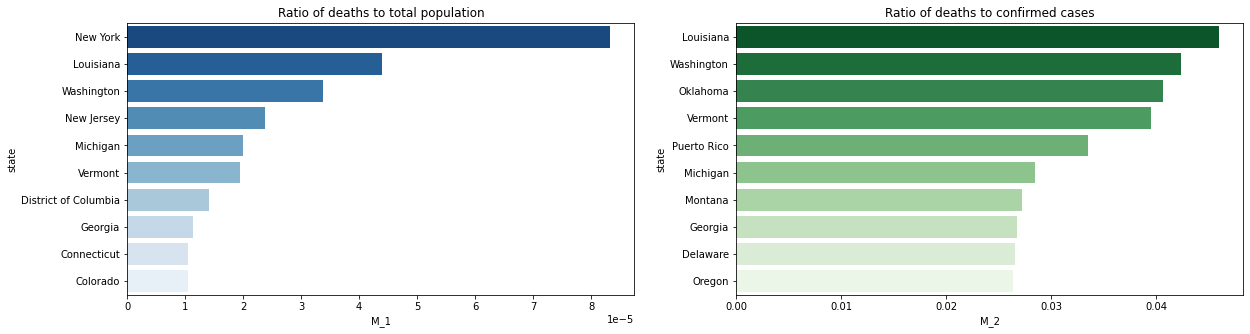

While it may seem like several states has had a rise in mortality rate, morbidity is a lagging indicator. Rarely will someone be classified as a confirmed case at the same time as suvival is confirmed positive or negitive (those being post mortem cases)

<a id="part-three"></a>
# Part Three: County Level Observations

Below we have the Pearson correlation coefficients for morbidity, infection rate, confirmed cases and deaths. A score close to one would mean that two variables are closely and positively related (as one increases so does the other), a score close to negative one indicates a strong negative relationship (as one value increases the other decreases), and a score close to zero indicates that there is not a strong relationship. The dataset below is blended from several other datasets, infection rate is a ratio of the current total divided by the the total from one week prior (so that exponential growth would be more visible). Morbidity rate is the number of deaths currently, divided by the number of infected from one week prior.  The visible table below contains correlations from a long list of factors I wished to explore, I chose not to include race specific columns from the dataset as it can sometimes be challenging to separate correlations from race from correlations due to socioeconomic status. There are a pair of hidden tables below with the unabridged data.

Also worth noting: the data used to make these correlations was all gathered pre-Covid, so there isn't any guarantee that changing one particular variable now will impact the disease in this area.

### Notable correlations:

There have been some interesting shifts since the first time these correlation tables were generated. The variation of the results is most likely the result of having more observed cases. There are now a lot of correlations one could mention I've plotted a few notable ones below these tables.

Results from table 4/5/20:
> 
>There are significant positive correlations between traffic density, and median household income with the morbidity rate for a county. Motor vehicle mortality rate and percent rural had a significant negative impact. Rate of change for infections didn't seem to have a >strong linear relationship with anything I selected. HIV prevalence had a positive relationship with the total amount of confirmed cases and fatalities. Driving to work alone had a significant negative correlation with the total amount of confirmed cases and fatalities.
> 
>I had hoped to catch something a bit more actionable. So far the county level info just indicates that counties which are more rural, have longer commutes, low median household incomes are less at risk right now, but see as fast of a spread.


In [ ]:
cols = ['county', 'state' ,'confirmed', 'deaths', 'infection_rate', 'morbidity_rate',
        'percent_vaccinated', 'life_expectancy', 'child_mortality_rate', 
        'infant_mortality_rate', 'percent_frequent_physical_distress', 'percent_limited_access_to_healthy_foods', 'percent_insufficient_sleep',
        'percent_smokers', 'percent_adults_with_obesity', 'median_household_income', 'average_traffic_volume_per_meter_of_major_roadways',
       'percent_excessive_drinking', 'num_alcohol_impaired_driving_deaths', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement',
       'teen_birth_rate', 'num_uninsured', 'preventable_hospitalization_rate', 'percent_unemployed',
       'percent_adults_with_diabetes', 'hiv_prevalence_rate', 'percent_food_insecure', 'drug_overdose_mortality_rate', 'motor_vehicle_mortality_rate',
       'average_grade_performance', 'homicide_rate', 'suicide_rate_age_adjusted', 'firearm_fatalities_rate', 'juvenile_arrest_rate',
       'percent_homeowners', 'percent_less_than_18_years_of_age', 'percent_65_and_over', 'percent_female', 'percent_severe_housing_cost_burden',
       'percent_rural', 'percent_drive_alone_to_work', 'percent_long_commute_drives_alone']
cols_2 =['confirmed', 'deaths', 'infection_rate', 'morbidity_rate', 'incidence_rate_per_100k',
        'avg_annual_count','recent_trend', 'five_year_incidence_change_rate',
       'incidence_rate_per_100k_low_95', 'incidence_rate_per_100k_high_95',
       'five_year_incidence_change_rate_low_95', 'five_year_incidence_change_rate_high_95']

In [ ]:
county_corr = county.corr(method='pearson', min_periods=20)
#display(county_corr[['confirmed', 'deaths', 'infection_rate', 'morbidity_rate']].sort_values(by=['morbidity_rate'], ascending=False).head(25))
_ = county_corr[['confirmed', 'deaths', 'infection_rate', 'morbidity_rate']].sort_values(by=['morbidity_rate'], ascending=False).head(25)
display(_.style.background_gradient(cmap='BuGn'))
_ = county_corr[['confirmed', 'deaths', 'infection_rate', 'morbidity_rate']].sort_values(by=['morbidity_rate'], ascending=True).head(25)
_.style.background_gradient(cmap='BuGn')

In [ ]:
_ = county[cols]
county_corr = _.corr(method='pearson', min_periods=30)
_ = county_corr[['confirmed', 'deaths', 'infection_rate', 'morbidity_rate']].sort_values(by=['morbidity_rate'], ascending=False).head(62).drop(['confirmed', 'deaths', 'infection_rate', 'morbidity_rate'])
_.style.bar(color="#2ecc71")

Notice how for percent drive alone to work there is a negative correlation with confirmed cases and deaths,previously there was also a weak correlation between driving alone to work and morbidity, over the last month this correlation has weakened. On the opposite side of the spectrum, percent unemployed has a negative correlation with morbidity, but a positive correlation with total number of deaths and confirmed cases.

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(20, 5))
ax[0].set_title('percent drive alone to work by morbidity, .13 correlation')
sns.regplot(x='percent_drive_alone_to_work', y='morbidity_rate', data=county,  ax=ax[0])
ax[1].set_title('percent drive alone to work by confirmed cases, -.32 correlation')
sns.regplot(x='percent_drive_alone_to_work', y='confirmed', data=county,  ax=ax[1])
ax[2].set_title('percent drive alone to work by deaths, -.34 correlation')
sns.regplot(x='percent_drive_alone_to_work', y='deaths', data=county, ax=ax[2])
sns.despine(bottom=True, left=True);

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(20, 5))
ax[0].set_title('percent unemployed by morbidity, -.2 correlation')
sns.regplot(x='percent_unemployed', y='morbidity_rate', data=county,  ax=ax[0])
ax[1].set_title('percent unemployed by deaths, .4 correlation')
sns.regplot(x='percent_unemployed', y='confirmed', data=county,  ax=ax[1])
ax[2].set_title('percent unemployed by deaths, .42 correlation')
sns.regplot(x='percent_unemployed', y='deaths', data=county, ax=ax[2])
sns.despine(bottom=True, left=True);

### Noteable correlations with cancer:

In [ ]:
_ = county[cols_2]
county_corr = _.corr(method='pearson', min_periods=30)
_ = county_corr[['confirmed', 'deaths', 'infection_rate', 'morbidity_rate']].sort_values(by=['morbidity_rate'], ascending=False).drop(['confirmed', 'deaths', 'infection_rate', 'morbidity_rate'])
_.style.background_gradient(cmap="copper")


There is an interesting correlation with the high and low incidence change rate for cancer, notice how for the five year incidence change rate low there is a negative correlation with morbidity and for the five year incidence change rate high there is a positive correlation. This might recommend further research, at some point I would like to revisit this. 

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
ax[0].set_title(', -0.32 correlation')
sns.regplot(x='five_year_incidence_change_rate_low_95', y='morbidity_rate', data=county,  ax=ax[0])
ax[1].set_title(', .34 correlation')
sns.regplot(x='five_year_incidence_change_rate_high_95', y='morbidity_rate', data=county,  ax=ax[1])
sns.despine(bottom=True, left=True);

Below we have the average annual count of cancer diagnosis for a location by the confirmed cases. The correlation coefficient is .76, however, there is no significant correlation between this and infection rate or morbidity. Because of this I suspect that the real correlation here is with population size and not anything specific to Covid. 

In [ ]:
sns.regplot(x='avg_annual_count', y='confirmed', data=county)
sns.despine(bottom=True, left=True);

Below we have two sets of horizontal bar charts. The first includes the counties with the highest number of confirmed cases and deaths. The pair of bar charts below the first two have the top ten counties with the highest increase in deaths and confirmed cases over the last week.

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20, 6))
_ = _county.sort_values(by=['confirmed'], ascending=False).head(10)
ax[0].set_title('Top 10 highestest number of confirmed cases')
sns.barplot(x=_['confirmed'], y=_['county'], palette='gist_heat',  orient='h', ax=ax[0])
_ = _county.sort_values(by=['deaths'], ascending=False).head(10)
ax[1].set_title('Top 10 highestest number of deceased')
sns.barplot(x=_['deaths'], y=_['county'], palette='gist_heat',  orient='h', ax=ax[1])
sns.despine(bottom=True, left=True);

<a id="part-four"></a>
# Timeline:

The two graphs below are relatively common, many similar plots are in circulation. These show the number of infected individuals over time and new cases per million over time. The time series starts March 7th, when the US hit a rate of 1 person infected for every million. Because of the wider view chosen for the graph, the growth curve will not seem exponential, the wider view is to get a closer look at progression at more of a one day at a time level. As of writing, the dataset only goes through April 28th, I plan to update this notebook as the datasets are updated on Kaggle. 

In [ ]:
plot_dat = cases_over_time.loc[cases_over_time['confirmed'] >= 400]#this starts this graph at the same date as the one beneith it
cases_per_million = cases_per_million.loc[cases_per_million.date >= '2020-03-07']
fig, ax =plt.subplots(2,1, figsize=(30, 18))

plt.setp(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('Confirmed cases and deaths over time')
sns.lineplot(x=plot_dat['last_update'], y=plot_dat['confirmed'], ci=None, ax=ax[0])
sns.lineplot(x=plot_dat['last_update'], y=plot_dat['deaths'], ci=None, ax=ax[0])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(labels=['Confirmed Cases', 'Deaths'], loc='upper left')


#cases_per_million = cases_per_million[['date', 'new_cases_per_million', 'new_deaths_per_million']]

plt.setp(ax[1].get_xticklabels(), rotation=45)
ax[1].set_title('New cases and deaths per million over time')
sns.lineplot(x=cases_per_million.date, y=cases_per_million.new_cases_per_million, ax=ax[1])
sns.lineplot(x=cases_per_million.date, y=cases_per_million.new_deaths_per_million, ci=None, ax=ax[1])
plt.xticks(rotation=45)
sns.despine(bottom=True, left=True);


# plt.setp(ax[1].get_xticklabels(), rotation=45)
# ax[1].set_title('Cases per million over time')
# sns.lineplot(x=positive_per_mil.date, y=positive_per_mil.total_confirmed_cases_of_covid_19_per_million_people_cases_per_million, ax=ax[1]);
# #plt.xticks(rotation=45);

### Datasets
Below I have created two new csv files which have the datasets used for the county and state level observations. If you use either of these please make sure to cite the appropriate sources (see part one).

In [ ]:
risk.to_csv('state_level_data.csv')
county.to_csv('count_level_data.csv')

### Priority ventilator need by US county
Below is a list of the top twenty US counties I would prioritize for ventilators and PPE. This list was generated by selecting the top 100 counties for the US by number of deaths, then filtering that list down to the top twenty by morbidity rate, then repeating the same steps with the top 100 counties by confirmed cases, and merging the two lists.

In [ ]:
_ = county.sort_values(by=['deaths'], ascending=False).head(100)
_ = _.sort_values(by=['morbidity_rate'], ascending=False).head(20)
l_1 = list(_.temp)
_ = county.sort_values(by=['confirmed'], ascending=False).head(100)
_ = _.sort_values(by=['morbidity_rate'], ascending=False).head(20)
l_2 = list(_.temp)
for s in l_1:
    if s in l_2:
        pass
    else:
        l_2 = l_2 + [s]
l_2

<a id="conclusion"></a>
# Conclusion:
Above is the list of counties currently in need of ventilators and PPE. The steps used to generate this list can be useful for determining current need so long as one can get at least one weeks worth of valid data for a locale (which isn't exactly effortless). I suspect there may be some useful insights to be gained from the data on cancer occurrences in populations, I will continue to look into this and hopefully add more to the notebook in the coming week.

# Final thoughts

There are more answers in the data that I didn't manage to find. There were opportunities to view the data from a county level but I chose to keep it higher level so that I could make a final dataframe that was intelligible when viewed all at once. If one were to view the information at a county level then they might also find the county health rankings dataset useful, one could have aggregated the county level information to get state level answers as well.


This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. For past TOTW check out the link to my page on github for this ongoing project https://github.com/Neil-Kloper/Weekly-Kaggle-Task/wiki